<h1>Tuning a Random Forest</h1>

<h3>Random Forest Parameters</h3>

<p>Scikit-learn offers a variety of tuning parameters that can be used to improve the performance of a Random Forest Classifier</p>

<p>Since a random forest is made up of decision trees, we have all the same tuning parameters for prepruning as we did for decision trees:</p>
<ul>
    <li>max_depth</li>
    <li>min_samples_leaf</li>
    <li>max_leaf_nodes</li>
</ul>
<strong>With random forests, it is generally not important to tune these as overfitting is generally not an issue.</strong>

<p>In addition you can tune these random tree specific paramters</p>
<ul>
    <li>n_estimators (the number of trees),<br/>where the default is set to 10 trees. This often works well but may in some cases be too small.</li>
    <li>max_features (the number of features to consider at each split),<br/>where the default value is the square root of the number of features (or predictors) and it is generally a good choice for max features and we usually will not need to change it.</li>
</ul>

<strong>One of the big advantages of Random Forests is that they rarely require much tuning. The default values will work well on most datasets.</strong>

<h3>Grid Search</h3>

<p>Let’s use Grid Search to compare the performance of a random forest with different numbers of trees.</p>

<p>But first we import and prepare the data</p>

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

<p>Now we set up the parameter grid of the parameters we want to vary and give a list of the values to try.</p>

In [2]:
param_grid = {
    # None gives the default number of features to consider at each split which is in our case is the square root of 30 features in the original dataset.
    'max_features': [None, 10, 20],
    'n_estimators': [10, 25, 50, 75, 100],
}

<p>Next we create a Random Forest Classifier and a Grid Search with 5-folds.</p>

In [3]:
rf = RandomForestClassifier(random_state=101) # To avoid outputting a different best parameter each time, one can set the random_state in the classifier.
gs = GridSearchCV(rf, param_grid, cv=5)

<p>Now we use the fit method to run the grid search. The best parameters will be stored in the best_params_ attribute.</p>

In [4]:
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'max_features': 20, 'n_estimators': 75}


<p>
    Accuracy will work okay for us in this case as the classes in the breast cancer dataset are reasonably balanced.<br/>If the classes are imbalanced, we would want to use an alternative metric, like the f1-score.</p>
    
<strong>
    This is tried out next and gives the same tuning results with 75 estimators or decision trees, and a max of 20 features to consider at each split.
</strong>

In [5]:
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'max_features': 20, 'n_estimators': 75}


<strong>You can add additional parameters, e.g. max_features, and parameter values to the param_grid dictionary to compare more decision trees.</strong>

<h3>Elbow Graph</h3>

<p>With a parameter like the number of trees in a random forest:</p>
<ul>
    <li>
        Increasing the number of trees will never hurt performance.<br/>Increasing the number trees will increase performance until a point where it levels out.
    </li>
    <li>
        However, The more trees we add the more complicated the algorithm would become.<br/>
        And a more complicated algorithm is more resource intensive to use.<br/>
        Generally it is worth adding complexity to the model if it improves performance but we do not want to unnecessarily add complexity.
    </li>
</ul>

<strong>
    To find the optimal value of n_estimators f.eks., we can use what is called an Elbow Graph as follows to help us optimize performance without adding unnecessary complexity.
</strong>

<p>
    Instead of just looking at the best params like we did before, we are going to use the entire result from the grid search.
</p>
<p>
The values are located in the <strong>cv_results_</strong> attribute. This is a dictionary with a lot of data, however, we will only need one of the keys: mean_test_score. Let’s pull out these values and store them as a variable.
</p>

In [6]:
n_estimators = list(range(1,101,1)) # Testing 1 to 100 n-estimators with 5 intervall in between to avoid long run time.

param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier(random_state=101) # To avoid outputting a different best parameter each time, one can set the random_state in the classifier.
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']
print(scores)

[0.92973141 0.91561869 0.93322465 0.92794597 0.94028878 0.93325571
 0.94381307 0.94028878 0.94555193 0.95081509 0.94730632 0.94555193
 0.94730632 0.94730632 0.95081509 0.95081509 0.95783263 0.95607825
 0.95432386 0.95607825 0.95432386 0.95256948 0.95256948 0.95432386
 0.95256948 0.95432386 0.95255395 0.94904518 0.95079957 0.95079957
 0.95255395 0.94904518 0.95079957 0.95079957 0.95255395 0.95255395
 0.95255395 0.95256948 0.95079957 0.95432386 0.95255395 0.95256948
 0.95256948 0.95256948 0.95256948 0.95256948 0.95432386 0.95432386
 0.95432386 0.95607825 0.95783263 0.95607825 0.95607825 0.95783263
 0.95607825 0.95783263 0.95432386 0.95783263 0.95607825 0.95783263
 0.95783263 0.95783263 0.95432386 0.95607825 0.95607825 0.95607825
 0.95607825 0.95607825 0.95607825 0.95783263 0.95783263 0.95607825
 0.95783263 0.95607825 0.95607825 0.95432386 0.95432386 0.95607825
 0.95432386 0.95432386 0.95432386 0.95432386 0.95432386 0.95607825
 0.95432386 0.95432386 0.95432386 0.95607825 0.95432386 0.9560

C:\Users\MOHAMMEDG\Anaconda3\envs\ml\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


<p>Now let’s use matplotlib to graph the results.</p>

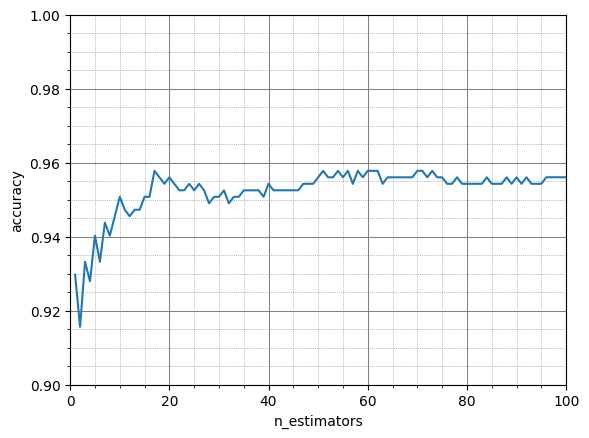

In [7]:
import matplotlib.pyplot as plt

plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.minorticks_on()
plt.grid(True)
# Add major grid
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.75)
# Add minor grid
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
plt.show()

<strong>
    If we look at this graph, we see that around 15 trees the graph levels out.
<br/>
    The best model also occurred at many n_estimators after that such as 17, 52 and 70..., but given how volatile it is, that was probably due to random chance.
<br/>
    We should choose about 15 to be our number of estimators, because we want the minimum number of estimators that still yield maximum performance.
</strong>

<p>Now we can build our random forest model with the optimal number of trees.</p>

In [8]:
rf = RandomForestClassifier(n_estimators=15)
rf.fit(X, y)

RandomForestClassifier(n_estimators=15)

<strong>You’ll see elbow graphs pop up in lots of different situations when we are adding complexity to a model and want to determine the minimal amount of complexity that will yield optimal performance.</strong>